In [67]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [2]:
train = pd.read_csv(r'C:\OneDrive - Parkway Pantai\WoRk\Pet projects\Jupyter notebook\Titanic dataset\train.csv')
test = pd.read_csv(r'C:\OneDrive - Parkway Pantai\WoRk\Pet projects\Jupyter notebook\Titanic dataset\test.csv')
combine = pd.concat([train.drop('Survived', axis=1),test])

In [78]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [15]:
print 'Train size = ', train.shape, '\n',  train.isnull().sum()
print ' \n Test size = ', test.shape, '\n', test.isnull().sum()

Train size =  (891, 12) 
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
 
 Test size =  (418, 11) 
PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


In [29]:
print 'Survived in training set = ', train[train.Survived == 1].shape[0]
print ' If I pedict all die, accuracy = ', 1 - 1.*train[train.Survived == 1].shape[0]/train.shape[0], ' %'

Survived in training set =  342
 If I pedict all die, accuracy =  0.616161616162  %


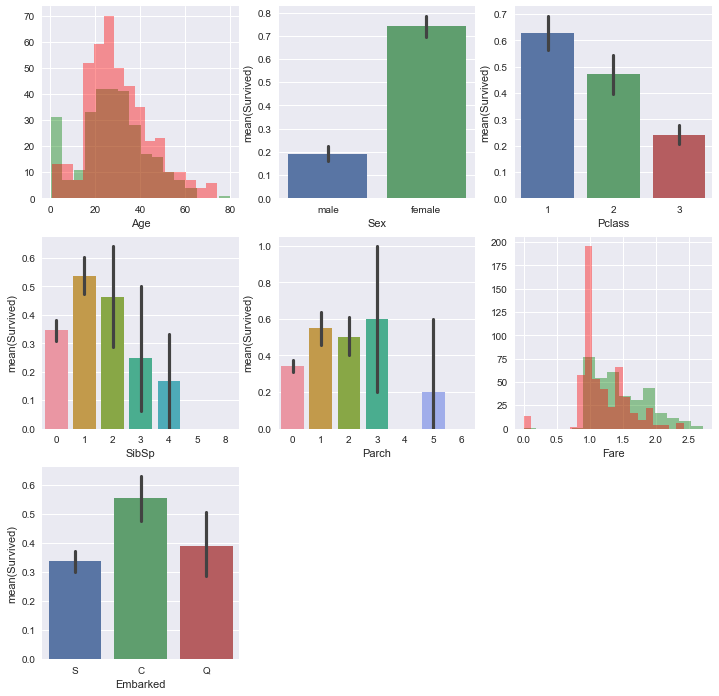

In [152]:
surv_color = 'green'
notsurv_color = 'red'
plt.figure(figsize=[12,12])
plt.subplot(331)
sns.distplot(train[train.Survived == 1].Age.dropna().values, color=surv_color, kde=False, axlabel="Age")
sns.distplot(train[train.Survived == 0].Age.dropna().values, color=notsurv_color, kde=False)
plt.subplot(332)
sns.barplot('Sex','Survived', data=train)
plt.subplot(333)
sns.barplot('Pclass','Survived', data=train)
plt.subplot(334)
sns.barplot('SibSp','Survived', data=train)
plt.subplot(335)
sns.barplot('Parch','Survived', data=train)
plt.subplot(336)
sns.distplot(np.log10(train[train.Survived==1].Fare.dropna().values+1), kde=False, color=surv_color, axlabel='Fare')
sns.distplot(np.log10(train[train.Survived==0].Fare.dropna().values+1), kde=False, color=notsurv_color)
plt.subplot(337)
sns.barplot('Embarked','Survived',data=train)


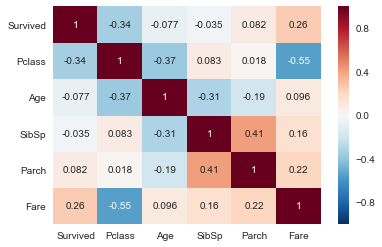

In [77]:
sns.heatmap(train.drop('PassengerId',1).corr(),annot=True )

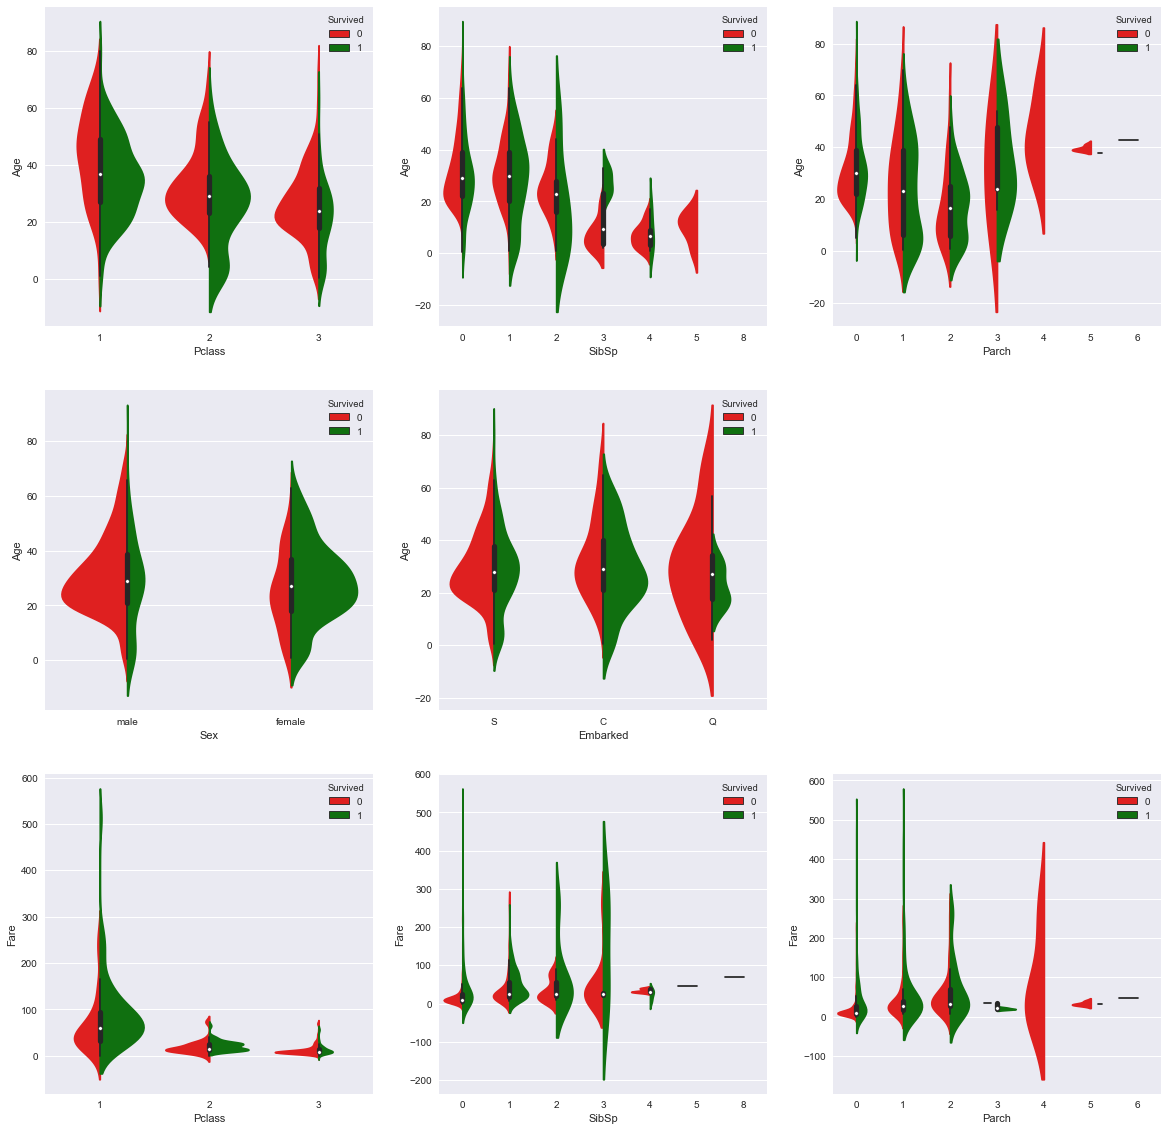

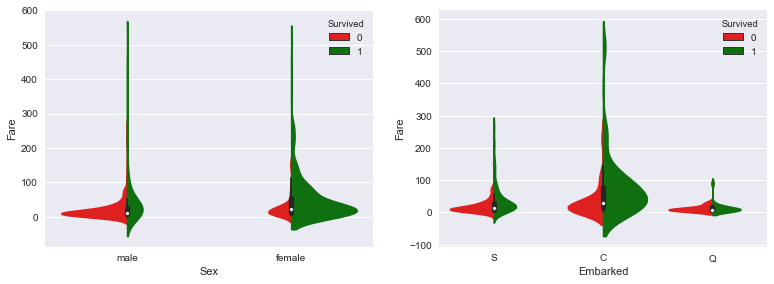

In [132]:
plt.figure(figsize=[20,20])
plt.subplot(331)
sns.violinplot(x='Pclass', y='Age', hue='Survived', data=train, split=True,palette={1:surv_color, 0:notsurv_color}, scale='count')
plt.subplot(332)
sns.violinplot(x='SibSp', y='Age', hue='Survived', data=train, split=True,palette={1:surv_color, 0:notsurv_color}, scale='count')
plt.subplot(333)
sns.violinplot(x='Parch',y='Age',data=train,hue='Survived',split=True,palette={1:surv_color, 0:notsurv_color}, scale='count')
plt.subplot(334)
sns.violinplot(x='Sex',y='Age',data=train,hue='Survived',split=True,palette={1:surv_color, 0:notsurv_color}, scale='count')
plt.subplot(335)
sns.violinplot(x='Embarked',y='Age',data=train,hue='Survived',split=True,palette={1:surv_color, 0:notsurv_color}, scale='count')
plt.subplot(337)
sns.violinplot(x='Pclass',y='Fare',data=train,hue='Survived',split=True,palette={1:surv_color, 0:notsurv_color}, scale='count')
plt.subplot(338)
sns.violinplot(x='SibSp',y='Fare',data=train,hue='Survived',split=True,palette={1:surv_color, 0:notsurv_color}, scale='count')
plt.subplot(339)
sns.violinplot(x='Parch',y='Fare',data=train,hue='Survived',split=True,palette={1:surv_color, 0:notsurv_color}, scale='count')
plt.figure(figsize=[20,20])
plt.subplot(431)
sns.violinplot(x='Sex',y='Fare',data=train,hue='Survived',split=True,palette={1:surv_color, 0:notsurv_color}, scale='count')
plt.subplot(432)
sns.violinplot(x='Embarked',y='Fare',data=train,hue='Survived',split=True,palette={1:surv_color, 0:notsurv_color}, scale='count')

Parch     0   1   2  3  4  5  6
Pclass                         
1       163  31  21  0  1  0  0
2       134  32  16  2  0  0  0
3       381  55  43  3  3  5  1


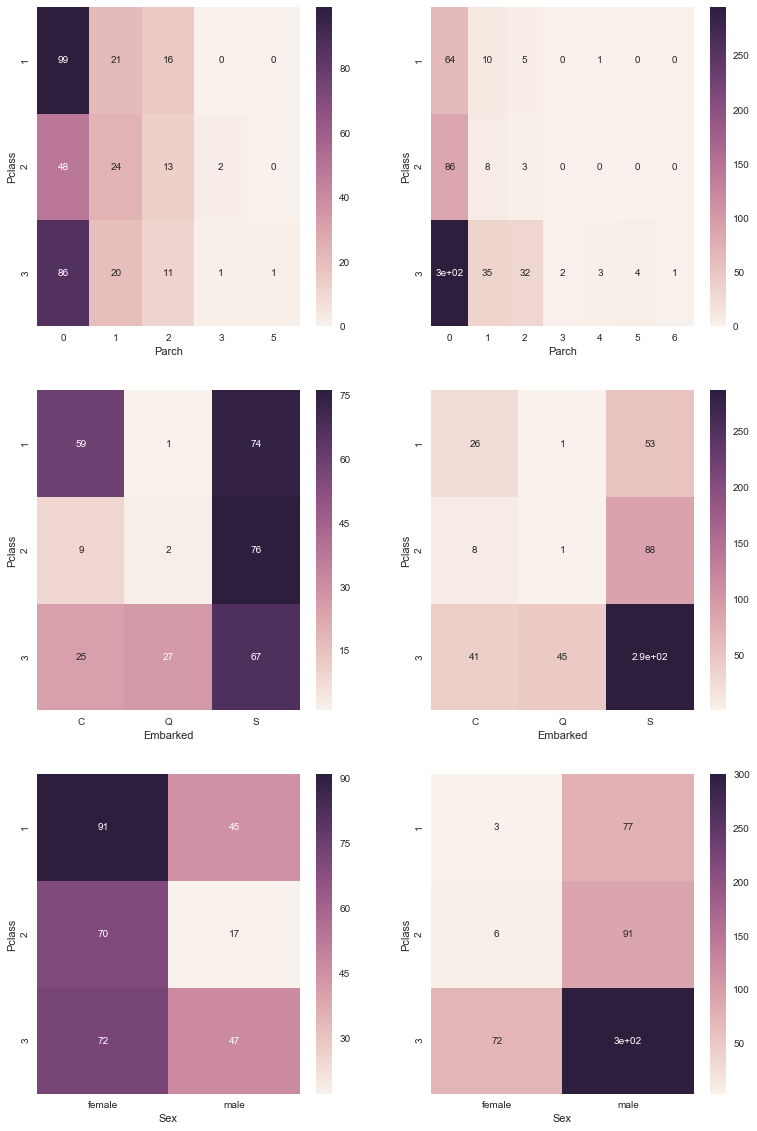

In [148]:
plt.figure(figsize=[20,20])
#plt.subplot(331)
#sns.factorplot(x='Parch',y='Pclass',hue='Survived',data=train,palette={0:notsurv_color, 1:surv_color})
print pd.crosstab(train.Pclass, train.Parch)
plt.subplot(331)
sns.heatmap(pd.crosstab(train[train.Survived==1].Pclass, train[train.Survived==1].Parch), annot=True)
plt.subplot(332)
sns.heatmap(pd.crosstab(train[train.Survived==0].Pclass, train[train.Survived==0].Parch), annot=True)

plt.subplot(334)
sns.heatmap(pd.crosstab(train[train.Survived==1].Pclass, train[train.Survived==1].Embarked), annot=True)
plt.subplot(335)
sns.heatmap(pd.crosstab(train[train.Survived==0].Pclass, train[train.Survived==0].Embarked), annot=True)

plt.subplot(337)
sns.heatmap(pd.crosstab(train[train.Survived==1].Pclass, train[train.Survived==1].Sex), annot=True)
plt.subplot(338)
sns.heatmap(pd.crosstab(train[train.Survived==0].Pclass, train[train.Survived==0].Sex), annot=True)